## Step 1: Data Wrangling and Dimensional Modeling

### Dataset of "flights"

In [1]:
!pwd

/home/ubuntu/notebooks


In [2]:
!xsv headers flights.csv

1   YEAR
2   MONTH
3   DAY
4   DAY_OF_WEEK
5   AIRLINE
6   FLIGHT_NUMBER
7   TAIL_NUMBER
8   ORIGIN_AIRPORT
9   DESTINATION_AIRPORT
10  SCHEDULED_DEPARTURE
11  DEPARTURE_TIME
12  DEPARTURE_DELAY
13  TAXI_OUT
14  WHEELS_OFF
15  SCHEDULED_TIME
16  ELAPSED_TIME
17  AIR_TIME
18  DISTANCE
19  WHEELS_ON
20  TAXI_IN
21  SCHEDULED_ARRIVAL
22  ARRIVAL_TIME
23  ARRIVAL_DELAY
24  DIVERTED
25  CANCELLED
26  CANCELLATION_REASON
27  AIR_SYSTEM_DELAY
28  SECURITY_DELAY
29  AIRLINE_DELAY
30  LATE_AIRCRAFT_DELAY
31  WEATHER_DELAY


There are 31 columns totally in the original dataset.

Since we want to remove 14 columns from the dataset and keep 17 columns, we can just select the columns which we want to reverve and create a new dataset called 'flights2'.

1   YEAR \
2   MONTH \
3   DAY \
4   DAY_OF_WEEK \
5   AIRLINE \
6   FLIGHT_NUMBER \
7   TAIL_NUMBER \
8   ORIGIN_AIRPORT \
9   DESTINATION_AIRPORT \
10  SCHEDULED_DEPARTURE \
11  DEPARTURE_TIME \
12  DEPARTURE_DELAY \
21  SCHEDULED_ARRIVAL \
22  ARRIVAL_TIME \
23  ARRIVAL_DELAY \
24  DIVERTED \
25  CANCELLED

In [3]:
!csvcut -c 1,2,3,4,5,6,7,8,9,10,11,12,21,22,23,24,25 flights.csv > flights2.csv

check the number of lines in the flights2 file.

In [4]:
!wc -l flights2.csv

2262736 flights2.csv


use csvcut -n to find the heading (attribute labels) of the flights2 file

In [5]:
!csvcut -n flights2.csv

  1: YEAR
  2: MONTH
  3: DAY
  4: DAY_OF_WEEK
  5: AIRLINE
  6: FLIGHT_NUMBER
  7: TAIL_NUMBER
  8: ORIGIN_AIRPORT
  9: DESTINATION_AIRPORT
 10: SCHEDULED_DEPARTURE
 11: DEPARTURE_TIME
 12: DEPARTURE_DELAY
 13: SCHEDULED_ARRIVAL
 14: ARRIVAL_TIME
 15: ARRIVAL_DELAY
 16: DIVERTED
 17: CANCELLED


Now there are 17 columns totally in the new dataset, flights2. \
Check the first few rows of the dataset in the 17 fields.

In [6]:
!head -n 10 flights2.csv

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,0430,0408,-22,0,0
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,0750,0741,-9,0,0
2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2,0806,0811,5,0,0
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,0805,0756,-9,0,0
2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,0320,0259,-21,0,0
2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,0020,-5,0602,0610,8,0,0
2015,1,1,4,NK,612,N635NK,LAS,MSP,0025,0019,-6,0526,0509,-17,0,0
2015,1,1,4,US,2013,N584UW,LAX,CLT,0030,0044,14,0803,0753,-10,0,0
2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,0030,0019,-11,0545,0532,-13,0,0


Then we can use xsv stat to summarize the statistical information of each column.

In [7]:
!xsv select 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17 flights2.csv | xsv stats | xsv table

field                type     sum         min     max     min_length  max_length  mean                  stddev
YEAR                 Integer  4559411025  2015    2015    4           4           2015                  0
MONTH                Integer  6652455     1       5       1           1           2.9400062313967723    1.375729171228196
DAY                  Integer  33875698    1       31      1           2           14.971129186582685    8.485016498392879
DAY_OF_WEEK          Integer  8935466     1       7       1           1           3.9489670686139298    1.977531473658097
AIRLINE              Unicode              AA      WN      2           2                                 
FLIGHT_NUMBER        Integer  5012085730  1       9794    1           4           2215.0564383368933    1781.225542621549
TAIL_NUMBER          Unicode              D942DN  N9EAMQ  0           6                                 
ORIGIN_AIRPORT       Unicode              ABE     YUM     3           3              

### check of unique data

In [8]:
!head -n 58190 flights2.csv | csvstat

  1. "YEAR"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2015
	Largest value:         2015
	Sum:                   117250835
	Mean:                  2015
	Median:                2015
	StDev:                 0
	Most common values:    2015 (58189x)

  2. "MONTH"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most common values:    True (58189x)

  3. "DAY"

	Type of data:          Number
	Contains null values:  False
	Unique values:         4
	Smallest value:        1
	Largest value:         4
	Sum:                   141990
	Mean:                  2.44
	Median:                2
	StDev:                 1.068
	Most common values:    2 (16741x)
	                       3 (15434x)
	                       1 (13950x)
	                       4 (12064x)

  4. "DAY_OF_WEEK"

	Type of data:          Number
	Contains null values:  False
	Unique values:         4
	Smallest value:        4
	La

### Dataset of "airlines"

In [9]:
!xsv headers airlines.csv

1   IATA_CODE
2   AIRLINE


Check the number of lines in the airlines file.

In [10]:
!wc -l airlines.csv

15 airlines.csv


In [11]:
!head -n 15 airlines.csv

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.
DL,Delta Air Lines Inc.
EV,Atlantic Southeast Airlines
HA,Hawaiian Airlines Inc.
MQ,American Eagle Airlines Inc.
VX,Virgin America


In [12]:
!head -n 15 airlines.csv | csvstat

  1. "IATA_CODE"

	Type of data:          Text
	Contains null values:  False
	Unique values:         14
	Longest value:         2 characters
	Most common values:    UA (1x)
	                       AA (1x)
	                       US (1x)
	                       F9 (1x)
	                       B6 (1x)

  2. "AIRLINE"

	Type of data:          Text
	Contains null values:  False
	Unique values:         14
	Longest value:         28 characters
	Most common values:    United Air Lines Inc. (1x)
	                       American Airlines Inc. (1x)
	                       US Airways Inc. (1x)
	                       Frontier Airlines Inc. (1x)
	                       JetBlue Airways (1x)

Row count: 14


### Dataset of "airports"

In [13]:
!xsv headers airports.csv

1   IATA_CODE
2   AIRPORT
3   CITY
4   STATE
5   COUNTRY
6   LATITUDE
7   LONGITUDE


In [14]:
!wc -l airports.csv

323 airports.csv


In [15]:
!head -n 10 airports.csv

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717


In [16]:
!head -n 323 airports.csv | csvstat

  1. "IATA_CODE"

	Type of data:          Text
	Contains null values:  False
	Unique values:         322
	Longest value:         3 characters
	Most common values:    ABE (1x)
	                       ABI (1x)
	                       ABQ (1x)
	                       ABR (1x)
	                       ABY (1x)

  2. "AIRPORT"

	Type of data:          Text
	Contains null values:  False
	Unique values:         322
	Longest value:         77 characters
	Most common values:    Lehigh Valley International Airport (1x)
	                       Abilene Regional Airport (1x)
	                       Albuquerque International Sunport (1x)
	                       Aberdeen Regional Airport (1x)
	                       Southwest Georgia Regional Airport (1x)

  3. "CITY"

	Type of data:          Text
	Contains null values:  False
	Unique values:         308
	Longest value:         30 characters
	Most common values:    Albany (2x)
	                       Columbia (2x)
	                       Charleston (2

In [17]:
! pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.4.1
psycopg2==2.9.5
psycopg2-binary==2.9.5


In [18]:
! dropdb -U student group1

In [19]:
! createdb -U student group1

In [20]:
%load_ext sql

In [21]:
%sql postgresql://student@/group1

In [22]:
!psql --version

psql (PostgreSQL) 12.12 (Ubuntu 12.12-0ubuntu0.20.04.1)


### Create F_flights Table

In [23]:
%%sql 
DROP TABLE IF EXISTS F_flights;

CREATE TABLE F_flights (
  YEAR INTEGER NOT NULL,
  MONTH INTEGER NOT NULL,
  DAY INTEGER NOT NULL,
  DAY_OF_WEEK INTEGER NOT NULL,
  AIRLINE CHAR(2) NOT NULL,
  FLIGHT_NUMBER INTEGER NOT NULL,
  TAIL_NUMBER CHAR(10),
  ORIGIN_AIRPORT CHAR(20) NOT NULL,
  DESTINATION_AIRPORT CHAR(20) NOT NULL,
  SCHEDULED_DEPARTURE INTEGER NOT NULL,
  DEPARTURE_TIME INTEGER,
  DEPARTURE_DELAY INTEGER,
  SCHEDULED_ARRIVAL INTEGER,
  ARRIVAL_TIME INTEGER,
  ARRIVAL_DELAY INTEGER,
  DIVERTED INTEGER,
  CANCELLED INTEGER
);

 * postgresql://student@/group1
Done.
Done.


[]

In [24]:
%%sql 
select * from F_flights

 * postgresql://student@/group1
0 rows affected.


year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled


In [25]:
%%sql
COPY F_flights FROM '/home/ubuntu/notebooks/flights2.csv'
CSV
HEADER;

 * postgresql://student@/group1
2262735 rows affected.


[]

In [26]:
%%sql 
select COUNT(*) from F_flights;

 * postgresql://student@/group1
1 rows affected.


count
2262735


In [27]:
! wc -l flights2.csv

2262736 flights2.csv


The difference of 1 row is the head of the original files. Therefore, we have uploaded all rows of the tables, which is same for following tables.

#### NULL values in DEPARTURE_TIME, DEPARTURE_DELAY, ARRIVAL_TIME, ARRIVAL_DELAY

In [28]:
%%sql 
UPDATE F_flights 
SET DEPARTURE_TIME=0 
WHERE DEPARTURE_TIME IS NULL;

 * postgresql://student@/group1
49819 rows affected.


[]

In [29]:
%%sql 
UPDATE F_flights 
SET DEPARTURE_DELAY=0 
WHERE DEPARTURE_DELAY IS NULL;

 * postgresql://student@/group1
49819 rows affected.


[]

In [30]:
%%sql 
UPDATE F_flights 
SET ARRIVAL_TIME=0 
WHERE ARRIVAL_TIME IS NULL;

 * postgresql://student@/group1
52562 rows affected.


[]

In [31]:
%%sql 
UPDATE F_flights 
SET ARRIVAL_DELAY=0 
WHERE ARRIVAL_DELAY IS NULL;

 * postgresql://student@/group1
56923 rows affected.


[]

### Create Airports Table

In [32]:
%%sql
DROP TABLE IF EXISTS Airports;

CREATE TABLE Airports (
 IATA_CODE CHAR(3) ,
 AIRPORT varchar(100) ,
 CITY CHAR(30) ,
 STATE CHAR(3) ,
 COUNTRY CHAR(3) ,
 LATITUDE FLOAT ,
 LONGITUDE FLOAT
);

 * postgresql://student@/group1
Done.
Done.


[]

In [33]:
%%sql
COPY Airports FROM '/home/ubuntu/notebooks/airports.csv'
CSV
HEADER;

 * postgresql://student@/group1
322 rows affected.


[]

In [34]:
%%sql 
select COUNT(*) from Airports;

 * postgresql://student@/group1
1 rows affected.


count
322


In [35]:
! wc -l airports.csv

323 airports.csv


### Create Airlines Table

In [36]:
%%sql
DROP TABLE IF EXISTS Airlines;

CREATE TABLE Airlines (
 IATA_CODE CHAR(3) ,
 AIRLINE varchar(100) 
);

 * postgresql://student@/group1
Done.
Done.


[]

In [37]:
%%sql
COPY Airlines FROM '/home/ubuntu/notebooks/airlines.csv'
CSV
HEADER;

 * postgresql://student@/group1
14 rows affected.


[]

In [38]:
%%sql 
select COUNT(*) from Airlines;

 * postgresql://student@/group1
1 rows affected.


count
14


In [39]:
! wc -l airlines.csv

15 airlines.csv


### Create Date_Dim as a dimension table

Create the Date_Dim table as a dimension table

In [40]:
%%sql
DROP TABLE IF EXISTS Date_Dim;

CREATE TABLE Date_Dim (
    Date_Key SERIAL PRIMARY KEY,
    YEAR INTEGER NOT NULL,
    MONTH INTEGER NOT NULL,
    DAY INTEGER NOT NULL,
    DAY_OF_WEEK INTEGER NOT NULL,
    DATE DATE NOT NULL 
);

 * postgresql://student@/group1
Done.
Done.


[]

Populate the Date_Dim table with data from table F_flights

In [41]:
%%sql
INSERT INTO Date_Dim(year,month,day,day_of_week,date) 
SELECT distinct year,month,day,day_of_week,
cast(year::char(4)||'-'||month::char(2)||'-'||day::char(2) as date)::date
FROM F_flights
ORDER BY date;

 * postgresql://student@/group1
144 rows affected.


[]

In [42]:
%%sql
select * from Date_Dim
limit 10

 * postgresql://student@/group1
10 rows affected.


date_key,year,month,day,day_of_week,date
1,2015,1,1,4,2015-01-01
2,2015,1,2,5,2015-01-02
3,2015,1,3,6,2015-01-03
4,2015,1,4,7,2015-01-04
5,2015,1,5,1,2015-01-05
6,2015,1,6,2,2015-01-06
7,2015,1,7,3,2015-01-07
8,2015,1,8,4,2015-01-08
9,2015,1,9,5,2015-01-09
10,2015,1,10,6,2015-01-10


Next, we add FK Date_key to the F_flights table.

In [43]:
%%sql
ALTER TABLE F_flights 
ADD COLUMN Date_Key INTEGER NULL ,
ADD CONSTRAINT fk_Date
    FOREIGN KEY (Date_Key)
    REFERENCES Date_Dim(Date_Key);

 * postgresql://student@/group1
Done.


[]

Populate the Date_key by linking the attributes from Date_Dim table and F_flights table

In [44]:
%%sql
UPDATE F_flights AS f
SET Date_Key = t.Date_Key
FROM Date_Dim AS t
WHERE f.year = t.year
and f.month = t.month
and f.day = t.day
and f.day_of_week=t.day_of_week;

 * postgresql://student@/group1
2262735 rows affected.


[]

We can check the Date_Dim table we just modified by examining the first 10 rows.

In [45]:
%%sql
select * from Date_Dim
limit 10

 * postgresql://student@/group1
10 rows affected.


date_key,year,month,day,day_of_week,date
1,2015,1,1,4,2015-01-01
2,2015,1,2,5,2015-01-02
3,2015,1,3,6,2015-01-03
4,2015,1,4,7,2015-01-04
5,2015,1,5,1,2015-01-05
6,2015,1,6,2,2015-01-06
7,2015,1,7,3,2015-01-07
8,2015,1,8,4,2015-01-08
9,2015,1,9,5,2015-01-09
10,2015,1,10,6,2015-01-10


The Date_key attribute has been successfully added to the F_flights table from the output.

### Create the Airports_Dim table as a dimension table

In [46]:
%%sql
CREATE TABLE Airports_Dim (
 Airports_Key SERIAL PRIMARY KEY,
 IATA_CODE CHAR(3) ,
 AIRPORT varchar(100) ,
 CITY CHAR(30) ,
 STATE CHAR(3) ,
 COUNTRY CHAR(3) ,
 LATITUDE FLOAT ,
 LONGITUDE FLOAT
);

 * postgresql://student@/group1
Done.


[]

Populate the Airports_Dim table with data from the F_flights table

In [47]:
%%sql
INSERT INTO Airports_Dim (IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE)
SELECT DISTINCT IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
FROM Airports;

 * postgresql://student@/group1
322 rows affected.


[]

Check the Airports_Dim table we just created by examining the first 10 rows

In [48]:
%%sql
SELECT * FROM Airports_Dim
Limit 30

 * postgresql://student@/group1
30 rows affected.


airports_key,iata_code,airport,city,state,country,latitude,longitude
1,ORH,Worcester Regional Airport,Worcester,MA,USA,42.26734,-71.87571
2,SAN,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
3,RST,Rochester International Airport,Rochester,MN,USA,43.90883,-92.49799
4,BUR,Bob Hope Airport (Hollywood Burbank Airport),Burbank,CA,USA,34.20062,-118.3585
5,FAY,Fayetteville Regional Airport,Fayetteville,NC,USA,34.99147,-78.88
6,AGS,Augusta Regional Airport (Bush Field),Augusta,GA,USA,33.36996,-81.9645
7,ICT,Wichita Dwight D. Eisenhower National Airport (Wichita Mid-Continent Airport),Wichita,KS,USA,37.64996,-97.43305
8,DRO,Durango-La Plata County Airport,Durango,CO,USA,37.15152,-107.75377
9,SUX,Sioux Gateway Airport,Sioux City,IA,USA,42.4026,-96.38437
10,RIC,Richmond International Airport,Richmond,VA,USA,37.50517,-77.31967


Populate the origin_airport_key and destination_airport_key

In [49]:
%%sql
ALTER TABLE f_flights 
ADD COLUMN origin_airport_key INTEGER  NULL,
ADD COLUMN destination_airport_key INTEGER  NULL,
ADD FOREIGN KEY (origin_airport_key) REFERENCES Airports_DIM (Airports_Key) ON DELETE SET NULL,
ADD FOREIGN KEY (destination_airport_key) REFERENCES Airports_DIM (Airports_Key) ON DELETE SET NULL
;

 * postgresql://student@/group1
Done.


[]

In [50]:
%%sql
UPDATE F_flights AS f
SET origin_airport_key = t.Airports_Key
FROM Airports_Dim AS t
WHERE f.origin_airport = t.IATA_CODE;

 * postgresql://student@/group1
2262735 rows affected.


[]

In [51]:
%%sql
UPDATE F_flights AS f
SET destination_airport_key = t.Airports_Key
FROM Airports_Dim AS t
WHERE f.destination_airport = t.IATA_CODE;

 * postgresql://student@/group1
2262735 rows affected.


[]

### Create the Airlines_Dim table as a dimension table

In [52]:
%%sql
DROP TABLE IF EXISTS Airlines_Dim;
CREATE TABLE Airlines_Dim (
 Airlines_Key SERIAL PRIMARY KEY,
 IATA_CODE CHAR(3) ,
 AIRLINE varchar(100) 
);

 * postgresql://student@/group1
Done.
Done.


[]

In [53]:
%%sql
INSERT INTO Airlines_Dim (IATA_CODE,AIRLINE)
SELECT DISTINCT 
IATA_CODE, AIRLINE
FROM Airlines;

 * postgresql://student@/group1
14 rows affected.


[]

In [54]:
%%sql
ALTER TABLE F_flights 
ADD COLUMN Airlines_Key INTEGER NULL,
ADD FOREIGN KEY (Airlines_Key) 
REFERENCES Airlines_Dim (Airlines_Key) ON DELETE SET NULL;

 * postgresql://student@/group1
Done.


[]

In [55]:
%%sql
UPDATE F_flights AS f
SET Airlines_Key = t.Airlines_Key
FROM Airlines_Dim AS t
WHERE f.airline = t.IATA_CODE;

 * postgresql://student@/group1
2262735 rows affected.


[]

In [56]:
%%sql
select * from Airlines_Dim
limit 20;

 * postgresql://student@/group1
14 rows affected.


airlines_key,iata_code,airline
1,OO,Skywest Airlines Inc.
2,MQ,American Eagle Airlines Inc.
3,US,US Airways Inc.
4,WN,Southwest Airlines Co.
5,NK,Spirit Air Lines
6,F9,Frontier Airlines Inc.
7,B6,JetBlue Airways
8,VX,Virgin America
9,UA,United Air Lines Inc.
10,DL,Delta Air Lines Inc.


### Create the Flights_Dim table as a dimension table

In [57]:
%%sql
DROP TABLE IF EXISTS Flights_Dim;
CREATE TABLE Flights_Dim (
 Flights_Key SERIAL PRIMARY KEY,
 flight_number INTEGER ,
 tail_number CHAR(10)
);

 * postgresql://student@/group1
Done.
Done.


[]

In [58]:
%%sql
INSERT INTO Flights_Dim (flight_number,tail_number)
SELECT DISTINCT 
flight_number,tail_number
FROM F_flights;

 * postgresql://student@/group1
1063911 rows affected.


[]

In [59]:
%%sql
ALTER TABLE F_flights 
ADD COLUMN Flights_Key INTEGER NULL,
ADD FOREIGN KEY (Flights_Key) 
    REFERENCES Flights_Dim (Flights_Key) ON DELETE SET NULL;

 * postgresql://student@/group1
Done.


[]

In [60]:
%%sql
UPDATE F_flights AS f
SET Flights_Key = t.Flights_Key
FROM Flights_Dim AS t
WHERE f.flight_number = t.flight_number AND f.tail_number = t.tail_number;

 * postgresql://student@/group1
2253647 rows affected.


[]

We can drop all the unnecessary columns from the rides table and only reserve the facts and surrogate keys.

In [61]:
%%sql
ALTER TABLE F_flights 
DROP COLUMN year,
DROP COLUMN month,
DROP COLUMN day,
DROP COLUMN day_of_week,
DROP COLUMN airline,
DROP COLUMN flight_number,
DROP COLUMN tail_number,
DROP COLUMN origin_airport,
DROP COLUMN destination_airport;

 * postgresql://student@/group1
Done.


[]

Check the F_flights table we just modified by examining the first 10 rows.

In [62]:
%%sql
select * from F_flights
limit 20;

 * postgresql://student@/group1
20 rows affected.


scheduled_departure,departure_time,departure_delay,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,date_key,origin_airport_key,destination_airport_key,airlines_key,flights_key
5,2354,-11,430,408,-22,0,0,1,305,132,14,21673
500,452,-8,549,543,-6,0,0,1,174,128,12,22709
500,513,13,629,638,9,0,0,1,181,302,1,991908
545,542,-3,904,858,-6,0,0,1,36,233,9,352840
545,541,-4,1156,1207,11,0,0,1,132,206,9,397459
545,550,5,814,807,-7,0,0,1,153,206,9,488941
600,751,111,928,1131,123,0,0,1,200,206,9,67520
600,600,0,736,735,-1,0,0,1,295,206,9,70453
600,603,3,853,835,-18,0,0,1,162,293,9,91473
600,555,-5,850,841,-9,0,0,1,78,132,14,153100


Check the number of records in our fact table. If it shows 5819079 , which is the original number of records in our dataset, then we have succeeded in the wrangling steps.

In [63]:
%%sql
select count(*) from F_flights

 * postgresql://student@/group1
1 rows affected.


count
2262735


## Ask 3: Data analysis and visualization

### Business Question 1:
In order to improve the operating efficiency at major airports, the FAA would like to develop a system of reward and punishment based on the performance of major airline carriers. What are some measurements that they could use? And based on the result from the busiest route in USA in 2015, which airline performs the best and which airline performs the worst? 

#### The average method

First, our data scientist thinks that its always good to take a look at the avearges. So we are going to find what that number is for our dataset. 

#### Avg departure delay of airlines

We start with departure delay because this type of delay would mean that the flights are using resources such as runway space, air space, operating capacity, etc. This will generate a higher operating cost for the airpots, and for FAA, running at capacity or exceeding it may raise safty concerns as well. By calculating the average, we hope we can provide some insights for regulors so that they can probably using a price ladder to encourage airline carriers to operate more efficiently. 

In [64]:
%%sql
SELECT f.airlines_key , air.iata_code,air.airline, AVG(f.arrival_delay) + AVG(f.departure_delay) as total_avg_delay
FROM F_flights as f
join Airlines_Dim as air
    on f.airlines_key=air.airlines_key
GROUP BY f.airlines_key, air.iata_code, air.airline
ORDER BY total_avg_delay Desc

 * postgresql://student@/group1
14 rows affected.


airlines_key,iata_code,airline,total_avg_delay
6,F9,Frontier Airlines Inc.,35.1200572716748918
5,NK,Spirit Air Lines,26.4472863381160324
2,MQ,American Eagle Airlines Inc.,23.7452054161467720
9,UA,United Air Lines Inc.,19.0493359714913189
7,B6,JetBlue Airways,19.0359312872461429
13,AA,American Airlines Inc.,16.2363352695501896
11,EV,Atlantic Southeast Airlines,15.6018513414380759
1,OO,Skywest Airlines Inc.,13.9463174851245695
8,VX,Virgin America,13.1261690488794777
4,WN,Southwest Airlines Co.,12.9536101527846230


In [65]:
%matplotlib inline

<BarContainer object of 14 artists>

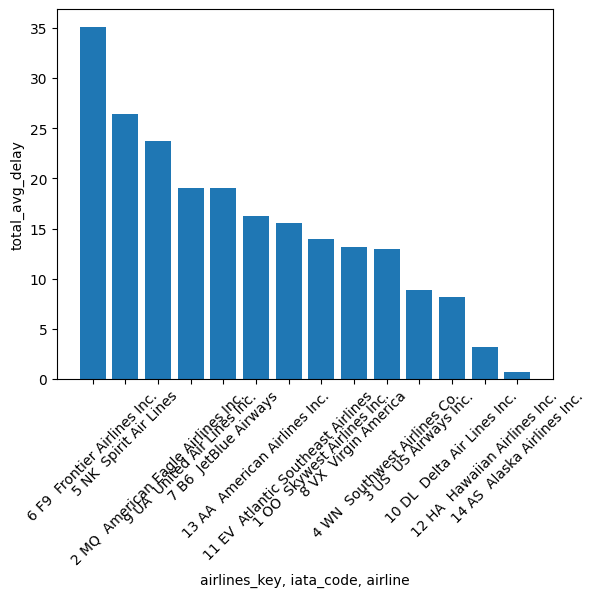

In [66]:
_.bar()

#### Avg arrival delay of airlines

We also want to count arrival delay as a factor, because the delay of arrival would also mean that this airline is prone to use more reasources mentioned above. 

In [67]:
%%sql
SELECT f.airlines_key , air.iata_code,air.airline, AVG(f.arrival_delay) as avg_arrival_delay
FROM F_flights as f
join Airlines_Dim as air
    on f.airlines_key=air.airlines_key
GROUP BY f.airlines_key, air.iata_code, air.airline
ORDER BY avg_arrival_delay Desc

 * postgresql://student@/group1
14 rows affected.


airlines_key,iata_code,airline,avg_arrival_delay
6,F9,Frontier Airlines Inc.,18.0096569792237860
5,NK,Spirit Air Lines,12.4880201474087937
2,MQ,American Eagle Airlines Inc.,11.5088420598610533
7,B6,JetBlue Airways,7.4515423427277058
11,EV,Atlantic Southeast Airlines,6.9510832001153378
1,OO,Skywest Airlines Inc.,6.0503036203065452
13,AA,American Airlines Inc.,5.9107628054342086
9,UA,United Air Lines Inc.,5.4628413375875357
8,VX,Virgin America,4.1993559202399859
4,WN,Southwest Airlines Co.,3.3846660916707738


In [68]:
%matplotlib inline

<BarContainer object of 14 artists>

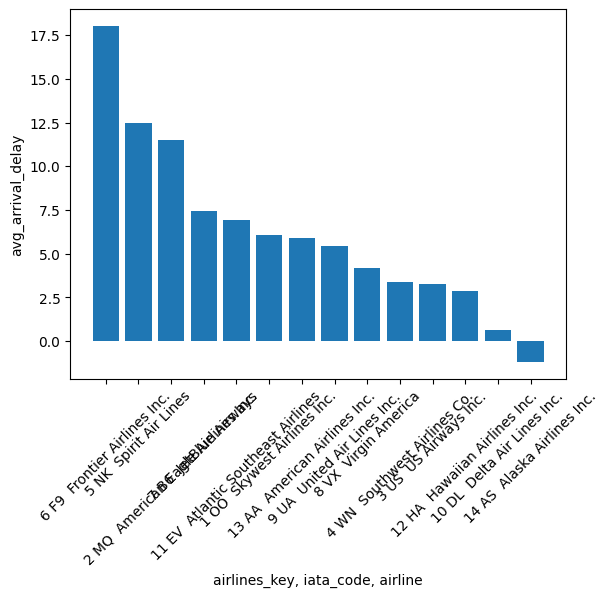

In [69]:
_.bar()

#### The Percentage of delay Method

Afterwards, we are going to set up another performance measurement criteria that seems to be more . The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. As a result, we will use a 15 minutes delay as threshold to measure the percentage of flight delays that is less than or equal to 15 minutes. But Why 15 minutes? Interestingly, few airlines strive to be 100 percent on time. In fact, reaching 100 percent OTP is all but impossible, and if achieved, it would have a negative effect on profits and financial performance. External factors ranging from weather, poorly located airport gates, industrial disputes or long immigration queues all can result in delays. Airlines plan with 15-minute criteria and typically aim to achieve around 85 percent to-90 percent OTP throughout the year. Planning for a shorter time period of 10 minutes and striving to achieve a higher OTP level of 95 percent  would require additional resources and lead to higher airfares for some travelers. A requirement for additional resources in terms of aircraft, crew and supporting operations woulbdn't make sense. For the best economic value for both airlines and customers, we choose 15 minutes as a threshold as the definition of delay. 

#### Finding the busiest Air route. 

In order to put this criteria into use, we think it would make more sense to specify this performance criteria by route than calculating the universal statistics like above. As a result, we are using the busiest airline route to demostrate, it would be connecting the 2 airports, which obviously, has the most count of departure flights and arrival flights.

In [70]:
%%sql
select origin_airport_key,destination_airport_key,count(*) as total_flight 
from F_flights
group by origin_airport_key,destination_airport_key
order by total_flight desc 
limit 6


 * postgresql://student@/group1
6 rows affected.


origin_airport_key,destination_airport_key,total_flight
78,65,5286
65,78,5284
302,78,5271
78,302,5161
73,78,4279
290,100,4145


After reffering to the airport key table, we found that the busiest route is A to B. So, we are combining the flgiht route A to B along with the flight route B to A, so that it counts both incoming flights and outgoing flights of those two airports. 

In [71]:
%%sql
with t1 as (
select case when cast(origin_airport_key as integer) > cast(destination_airport_key as integer) then concat(origin_airport_key,',',destination_airport_key) else concat(destination_airport_key,',',origin_airport_key) end as route,
origin_airport_key,destination_airport_key
from F_flights)
select route , count(*) as total_flights
from t1 
group by route
order by total_flights desc
limit 10 

 * postgresql://student@/group1
10 rows affected.


route,total_flights
"78,65",10570
"302,78",10432
"78,73",8421
"290,100",8261
"252,174",7260
"302,65",7178
"290,146",7071
"290,242",7039
"293,146",6876
"242,153",6728


#### Calculating the percentage of arrival delay. 

Here we put the 15 minute thershhold into use. 

In [72]:
%%sql 
with t1 as (
select case when cast(origin_airport_key as integer) > cast(destination_airport_key as integer) then concat(origin_airport_key,',',destination_airport_key) else concat(destination_airport_key,',',origin_airport_key) end as route,
origin_airport_key,destination_airport_key,airlines_key, case when arrival_delay > 15 then 1 else 0 end as delay
from F_flights),
t2 as (select airlines_key,count(*) as total_flights,sum(delay) as total_delay_flights
from t1 
where route = '302,78'
group by airlines_key)
select * ,(total_delay_flights*100)/total_flights as delay_percent 
from t2 

 * postgresql://student@/group1
5 rows affected.


airlines_key,total_flights,total_delay_flights,delay_percent
1,219,46,21
4,2648,633,23
8,2560,525,20
9,3307,717,21
13,1698,347,20


In [73]:
%matplotlib inline

<BarContainer object of 5 artists>

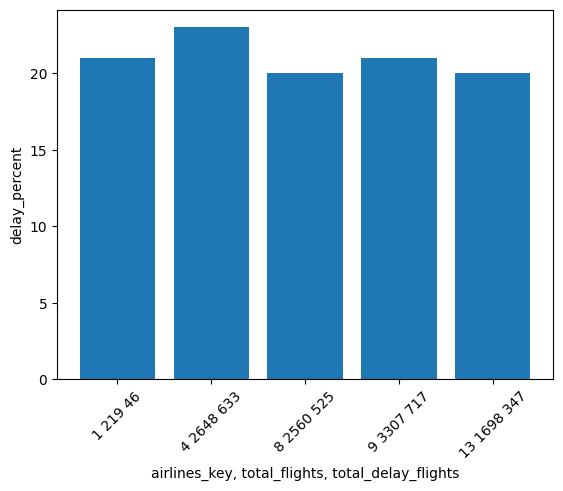

In [74]:
_.bar()

pic

In [75]:
%%sql
SELECT 
a.airline,
CASE
    WHEN (f.arrival_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline )::float  AS Percentage_Rate
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
GROUP BY 1,2;

 * postgresql://student@/group1
28 rows affected.


airline,delay,cnt,total_cnt,percentage_rate
Alaska Airlines Inc.,Late,8305,64695,0.12837158976736995
Alaska Airlines Inc.,On Time,56390,64695,0.87162841023263
American Airlines Inc.,Late,42076,208310,0.20198742259133023
American Airlines Inc.,On Time,166234,208310,0.7980125774086698
American Eagle Airlines Inc.,Late,33501,129834,0.2580294838023938
American Eagle Airlines Inc.,On Time,96333,129834,0.7419705161976061
Atlantic Southeast Airlines,Late,47502,235829,0.20142560923380926
Atlantic Southeast Airlines,On Time,188327,235829,0.7985743907661907
Delta Air Lines Inc.,Late,45870,327905,0.1398880773394733
Delta Air Lines Inc.,On Time,282035,327905,0.8601119226605267


## --> need visual

#### Calculating the percentage of Departure delay

In [76]:
%%sql 
with t1 as (
select case when cast(origin_airport_key as integer) > cast(destination_airport_key as integer) then concat(origin_airport_key,',',destination_airport_key) else concat(destination_airport_key,',',origin_airport_key) end as route,
origin_airport_key,destination_airport_key,airlines_key, case when departure_delay > 15 then 1 else 0 end as delay
from F_flights),
t2 as (select airlines_key,count(*) as total_flights,sum(delay) as total_delay_flights
from t1 
where route = '302,78'
group by airlines_key)
select * ,(total_delay_flights*100)/total_flights as delay_percent 
from t2 

 * postgresql://student@/group1
5 rows affected.


airlines_key,total_flights,total_delay_flights,delay_percent
1,219,44,20
4,2648,635,23
8,2560,474,18
9,3307,689,20
13,1698,303,17


In [77]:
%matplotlib inline

<BarContainer object of 5 artists>

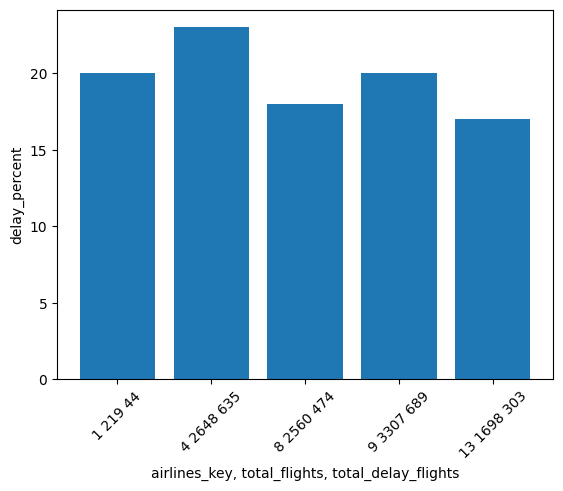

In [78]:
_.bar()

pic

### Question 2 : DC airports(DCA,IAD) to NYU(JFK) 

In the second question, we are shifting our focus from regulaors to cusotmers. 

During what time period, does the air route from Washington D.C. to New York sees the most delays? What are the reason for delays? Advices that we can give to airlines to better improve their service. 

For customers: calculating arrival delay

In [91]:
%%sql
SELECT 
a.airline,d.year, d.month,
CASE
    WHEN (f.arrival_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month ) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month )::float 
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
GROUP BY 1,2,3,4
Limit 6;

 * postgresql://student@/group1
6 rows affected.


airline,year,month,delay,cnt,total_cnt,?column?
Alaska Airlines Inc.,2015,1,Late,1939,13257,0.14626235196499962
Alaska Airlines Inc.,2015,1,On Time,11318,13257,0.8537376480350004
Alaska Airlines Inc.,2015,2,Late,1652,12194,0.1354764638346728
Alaska Airlines Inc.,2015,2,On Time,10542,12194,0.8645235361653272
Alaska Airlines Inc.,2015,3,Late,1970,14276,0.13799383580834967
Alaska Airlines Inc.,2015,3,On Time,12306,14276,0.8620061641916503


In [81]:
%%sql
SELECT * FROM (
SELECT 
a.airline,d.year, d.month,
CASE
    WHEN (f.arrival_delay)  < 15 THEN 'On Time'
    ELSE 'Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month ) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month )::float  AS R 
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
WHERE  origin_airport_key in (select airports_key from airports_dim WHERE iata_code in ('DCA','IAD'))
and destination_airport_key in (select airports_key from airports_dim WHERE iata_code in ('JFK'))
GROUP BY 1,2,3,4
) AS T 
WHERE delay='On Time';

 * postgresql://student@/group1
15 rows affected.


airline,year,month,delay,cnt,total_cnt,r
American Airlines Inc.,2015,1,On Time,11,31,0.3548387096774194
American Airlines Inc.,2015,2,On Time,12,27,0.4444444444444444
American Airlines Inc.,2015,3,On Time,12,31,0.3870967741935484
American Airlines Inc.,2015,4,On Time,20,30,0.6666666666666666
American Airlines Inc.,2015,5,On Time,13,23,0.5652173913043478
American Eagle Airlines Inc.,2015,1,On Time,103,154,0.6688311688311688
American Eagle Airlines Inc.,2015,2,On Time,93,140,0.6642857142857143
American Eagle Airlines Inc.,2015,3,On Time,105,144,0.7291666666666666
American Eagle Airlines Inc.,2015,4,On Time,23,30,0.7666666666666667
American Eagle Airlines Inc.,2015,5,On Time,19,23,0.8260869565217391


In [82]:
%%sql
SELECT * FROM (
SELECT 
a.airline,d.year, d.month,
CASE
    WHEN (f.arrival_delay + f.departure_delay)  < 15 THEN 'On Time'
    WHEN (f.arrival_delay + f.departure_delay)  BETWEEN  15  and  20 THEN 'Late'
    ELSE 'Very Late'
END as delay,
COUNT(*) AS cnt,
SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month ) AS total_cnt,
COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY a.airline,d.year, d.month )::float  AS R 
FROM F_flights f 
INNER JOIN date_dim d  ON  f.date_key=d.date_key
INNER JOIN airlines_dim a ON f.airlines_key=a.airlines_key
WHERE  origin_airport_key in (select airports_key from airports_dim WHERE iata_code in ('DCA','IAD'))
and destination_airport_key in (select airports_key from airports_dim WHERE iata_code in ('JFK'))
GROUP BY 1,2,3,4
) AS T 
WHERE delay='On Time';

 * postgresql://student@/group1
15 rows affected.


airline,year,month,delay,cnt,total_cnt,r
American Airlines Inc.,2015,1,On Time,12,31,0.3870967741935484
American Airlines Inc.,2015,2,On Time,8,27,0.2962962962962963
American Airlines Inc.,2015,3,On Time,10,31,0.3225806451612903
American Airlines Inc.,2015,4,On Time,19,30,0.6333333333333333
American Airlines Inc.,2015,5,On Time,14,23,0.6086956521739131
American Eagle Airlines Inc.,2015,1,On Time,95,154,0.6168831168831169
American Eagle Airlines Inc.,2015,2,On Time,84,140,0.6
American Eagle Airlines Inc.,2015,3,On Time,96,144,0.6666666666666666
American Eagle Airlines Inc.,2015,4,On Time,22,30,0.7333333333333333
American Eagle Airlines Inc.,2015,5,On Time,16,23,0.6956521739130435
